In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import plotly.express as px


In [2]:
from google.colab import drive

# Mount Google Drive to /content/drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# df_job_summary=pd.read_csv("/content/drive/MyDrive/NUS MSBA/CS5344/Group Project/job_summary.csv")

In [4]:
# df_job_summary.head()

In [5]:
# df_job_summary.count()

## Importing the Data Set

In [6]:
df_job_skills=pd.read_csv("/content/drive/MyDrive/NUS MSBA/CS5344/Group Project/job_skills.csv")

In [7]:
df_job_skills['job_link'][0]

'https://www.linkedin.com/jobs/view/housekeeper-i-pt-at-jacksonville-state-university-3802280436'

In [8]:
df_job_skills.head()

,job_link,job_skills
0,https://www.linkedin.com/jobs/view/housekeeper...,"Building Custodial Services, Cleaning, Janitor..."
1,https://www.linkedin.com/jobs/view/assistant-g...,"Customer service, Restaurant management, Food ..."
2,https://www.linkedin.com/jobs/view/school-base...,"Applied Behavior Analysis (ABA), Data analysis..."
3,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Engineering, Project Controls, Sche..."
4,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Assembly, Point to point wiring, St..."


In [9]:
df_job_skills.count()

job_link      1296381
job_skills    1294296
dtype: int64

In [10]:
df_job_postings=pd.read_csv("/content/drive/MyDrive/NUS MSBA/CS5344/Group Project/linkedin_job_postings.csv")

In [11]:
df_job_postings.tail(20)

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
1348434,https://ca.linkedin.com/jobs/view/assistant-di...,2024-01-21 07:39:59.363341+00,t,t,f,"Assistant Director, IT Modern Workplace Soluti...",BCJobs,"Victoria, British Columbia, Canada",2024-01-14,Esquimalt,Canada,Director Education,Mid senior,Onsite
1348435,https://uk.linkedin.com/jobs/view/senior-cardi...,2024-01-20 15:20:30.971126+00,t,t,f,Senior Cardiac Physiologist -Echocardiologist,KIMS Hospital,"Maidstone, England, United Kingdom",2024-01-16,Southend-on-Sea,United Kingdom,Perfusionist,Mid senior,Onsite
1348436,https://ca.linkedin.com/jobs/view/team-lead-ap...,2024-01-20 15:20:31.041227+00,t,t,f,"Team lead, Application Development",Stantec,"Winnipeg, Manitoba, Canada",2024-01-14,Manitoba,Canada,Architect,Mid senior,Onsite
1348437,https://www.linkedin.com/jobs/view/registered-...,2024-01-20 15:20:47.513837+00,t,t,f,Registered Nurse - Home Care at Health Advocat...,Health eCareers,"Saco, ME",2024-01-14,Maine,United States,Nurse-Midwife,Mid senior,Onsite
1348438,https://uk.linkedin.com/jobs/view/setter-opera...,2024-01-20 15:20:47.606311+00,t,t,f,Setter Operator Team Leader / Injection Mouldi...,AWD online,"Oldham, England, United Kingdom",2024-01-15,Blackburn,United Kingdom,Alarm Operator,Mid senior,Onsite
1348439,https://www.linkedin.com/jobs/view/rn-operatin...,2024-01-20 15:20:47.92305+00,t,t,f,"RN Operating Room, Pool - Surgery Center of Ea...",SCA Health,"Easton, MD",2024-01-14,Easton,United States,Model,Mid senior,Onsite
1348440,https://www.linkedin.com/jobs/view/assistant-g...,2024-01-20 15:20:47.985101+00,t,t,f,Assistant Guest Service Manager,The Fresh Market,"Memphis, TN",2024-01-17,West Memphis,United States,Train Clerk,Mid senior,Onsite
1348441,https://www.linkedin.com/jobs/view/business-in...,2024-01-20 15:20:48.345248+00,t,t,f,Business Intake Legal Analyst,Hunton Andrews Kurth LLP,"Richmond, VA",2024-01-16,Montpelier,United States,Lead Former,Mid senior,Onsite
1348442,https://www.linkedin.com/jobs/view/after-schoo...,2024-01-20 15:20:48.670083+00,t,t,f,After School Program Manager,Guidepost Montessori,"St Louis, MO",2024-01-13,Ferguson,United States,Program Coordinator,Mid senior,Onsite
1348443,https://www.linkedin.com/jobs/view/registered-...,2024-01-20 15:20:49.162243+00,t,t,f,Registered Nurse at Senior Living Properties LLC,Health eCareers,"New Braunfels, TX",2024-01-14,New Braunfels,United States,Medical Assistant,Mid senior,Onsite


In [12]:
df_job_postings.count()

job_link               1348454
last_processed_time    1348454
got_summary            1348454
got_ner                1348454
is_being_worked        1348454
job_title              1348454
company                1348443
job_location           1348435
first_seen             1348454
search_city            1348454
search_country         1348454
search_position        1348454
job_level              1348454
job_type               1348454
dtype: int64

In [13]:
# df_job_summary['job_link_cleaned'] = df_job_summary['job_link'].map(lambda x: x.split('-')[-1])
df_job_postings['job_link_cleaned'] = df_job_postings['job_link'].map(lambda x: x.split('-')[-1])
df_job_skills['job_link_cleaned'] = df_job_skills['job_link'].map(lambda x: x.split('-')[-1])

In [14]:
# df_job_summary['job_link_cleaned'].duplicated().sum()


In [15]:
# duplicate_rows=df_job_summary[df_job_summary['job_link_cleaned'].duplicated()]
# duplicate_rows

In [16]:
# x= df_job_summary[df_job_summary['job_link_cleaned']=='3733277967'] #.to_csv('duplicate_rows_filtered.csv', index=False)
# x

In [17]:
df_job_postings['job_link_cleaned'].duplicated().sum()

2285

In [18]:
duplicate_rows1=df_job_postings[df_job_postings['job_link_cleaned'].duplicated()]
duplicate_rows1

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_link_cleaned
1884,https://www.linkedin.com/jobs/director-records...,2024-01-19 09:45:09.215838+00,t,f,t,Director of Records & Information Governance,Epiq,"New York, NY",2024-01-15,North Adams,United States,Director Records Management,Mid senior,Onsite,jobs
3324,https://www.linkedin.com/jobs/warm-in-worker-jobs,2024-01-19 09:45:09.215838+00,f,f,f,Outpatient Therapist _ Social Worker _ Counseling,Ridgeview Behavioral Health Services,"Oak Ridge, TN",2024-01-17,Brigham City,United States,Warm-In Worker,Mid senior,Onsite,jobs
4459,https://au.linkedin.com/jobs/mechanical-test-t...,2024-01-19 09:45:09.215838+00,t,f,t,IPS Engineering Technician (Supply Support),Babcock Australia & New Zealand,"Adelaide, South Australia, Australia",2024-01-16,Werribee,Australia,Mechanical-Test Technician,Mid senior,Onsite,jobs
4830,https://www.linkedin.com/jobs/dispatcher-servi...,2024-01-19 09:45:09.215838+00,t,f,t,Router / Dispatcher,TOI TOI USA,"Alpharetta, GA",2024-01-13,Lebanon,United States,Dispatcher Service,Associate,Onsite,jobs
4899,https://www.linkedin.com/jobs/production-helpe...,2024-01-19 09:45:09.215838+00,t,f,t,Assemblers/Machine Operators $18- $21 hour in ...,Ultimate Staffing,"Hopkinton, MA",2024-01-13,South Dakota,United States,Production Helper,Mid senior,Onsite,jobs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1347339,https://www.linkedin.com/jobs/view/home-therap...,2024-01-21 07:11:26.014401+00,t,t,f,Home therapy registered nurse,Fresenius Medical Care North America,"Walnut Creek, CA",2024-01-14,Concord,United States,Supervisor Telephone Information,Mid senior,Onsite,3791764055
1347603,https://www.linkedin.com/jobs/pipe-fitter-supe...,2024-01-19 09:45:09.215838+00,f,f,f,Pipe Fitter/Welder Helper,"Independent Refrigeration Services, Inc.","York, PA",2024-01-16,Exeter,United States,Pipe-Fitter Supervisor,Associate,Onsite,jobs
1347607,https://uk.linkedin.com/jobs/view/prof-researc...,2024-01-19 12:25:49.092809+00,t,t,f,Prof & Research & Innovation Inst Director: In...,De Montfort University,"Leicester, England, United Kingdom",2024-01-16,Hastings,United Kingdom,Media Director,Mid senior,Onsite,3799335835
1347931,https://www.linkedin.com/jobs/view/floating-pe...,2024-01-21 08:20:46.600335+00,t,t,f,"Floating Personal Banking Consultant - *$1,500...",First Financial Northwest Bank,"Smokey Point, WA",2024-01-14,Arlington Heights,United States,Extra,Mid senior,Onsite,3781037141


In [19]:
#checking the job with no identifiers
x1= df_job_postings[df_job_postings['job_link_cleaned']=='jobs'] #.to_csv('duplicate_rows_filtered.csv', index=False)
x1['job_link'].iloc[-4]

'https://www.linkedin.com/jobs/tax-preparer-jobs'

In [20]:
df_job_skills['job_link_cleaned'].duplicated().sum()

1409

In [21]:
# df_job_summary.drop_duplicates(subset=['job_link_cleaned'], inplace=True)
df_job_skills.drop_duplicates(subset=['job_link_cleaned'], inplace=True)
df_job_postings.drop_duplicates(subset=['job_link_cleaned'], inplace=True)

In [22]:
Industry=pd.read_csv("/content/drive/MyDrive/NUS MSBA/CS5344/Group Project/Industry.csv")

In [23]:
Industry.head()

,company,Industry
0,Jobs for Humanity,Non-profit
1,LATICRETE International,Wholesale Building Materials
2,Dice,Software Development
3,Recruiting from Scratch,Staffing and Recruiting
4,Agoda,Software Development


## Combining the Dataset

In [24]:
# merged_df = pd.merge(df_job_summary, df_job_skills, on='job_link_cleaned', how='inner')

In [25]:
# merged_df.shape

In [26]:
final_merged_df = pd.merge(df_job_skills, df_job_postings, on='job_link_cleaned', how='inner')
final_merged_df = pd.merge(final_merged_df, Industry, on='company', how='inner')

In [27]:
final_merged_df.shape

(374982, 18)

In [28]:
final_merged_df.head()

,job_link_x,job_skills,job_link_cleaned,job_link_y,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,Industry
0,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Engineering, Project Controls, Sche...",3773709557,https://www.linkedin.com/jobs/view/electrical-...,2024-01-19 09:45:09.215838+00,t,t,f,Electrical Deputy Engineering Group Supervisor,Energy Jobline,"Ogden, UT",2024-01-12,Layton,United States,Cleaner,Mid senior,Onsite,Staffing and Recruiting
1,https://www.linkedin.com/jobs/view/constructio...,"Construction, General knowledge of constructio...",3791046095,https://www.linkedin.com/jobs/view/constructio...,2024-01-19 09:45:09.215838+00,t,t,f,Construction Supervisor Assistant in Rochester...,Energy Jobline,"Rochester, NY",2024-01-13,Williamson,United States,Clerk General,Mid senior,Onsite,Staffing and Recruiting
2,https://uk.linkedin.com/jobs/view/senior-techn...,"Electrical testing, Earthing systems, Substati...",3789491606,https://uk.linkedin.com/jobs/view/senior-techn...,2024-01-19 09:45:09.215838+00,t,t,f,"Senior Technician in Diss, UK",Energy Jobline,"Diss, England, United Kingdom",2024-01-12,Ipswich,United Kingdom,Assembler,Mid senior,Onsite,Staffing and Recruiting
3,https://www.linkedin.com/jobs/view/senior-util...,"Electrical Transmission, Reviews",3799784346,https://www.linkedin.com/jobs/view/senior-util...,2024-01-19 09:45:09.215838+00,t,t,f,Senior Utility Designer / Planner - Transmissi...,Energy Jobline,"Pomona, CA",2024-01-12,Pomona,United States,Art Director,Mid senior,Onsite,Staffing and Recruiting
4,https://www.linkedin.com/jobs/view/key-account...,"Medical Device, Data Management, IT Compliance...",3773725146,https://www.linkedin.com/jobs/view/key-account...,2024-01-19 09:45:09.215838+00,t,t,f,Key Account Manager – Life Sciences,Energy Jobline,"Wichita, KS",2024-01-12,Wichita,United States,Account Executive,Mid senior,Onsite,Staffing and Recruiting


In [29]:
final_merged_df.isnull().sum()

job_link_x               0
job_skills             381
job_link_cleaned         0
job_link_y               0
last_processed_time      0
got_summary              0
got_ner                  0
is_being_worked          0
job_title                0
company                  0
job_location             6
first_seen               0
search_city              0
search_country           0
search_position          0
job_level                0
job_type                 0
Industry                 0
dtype: int64

In [30]:
final_merged_df.dropna(subset=['job_skills','company','job_location','Industry'], inplace=True)

In [31]:
final_merged_df.columns

Index(['job_link_x', 'job_skills', 'job_link_cleaned', 'job_link_y',
       'last_processed_time', 'got_summary', 'got_ner', 'is_being_worked',
       'job_title', 'company', 'job_location', 'first_seen', 'search_city',
       'search_country', 'search_position', 'job_level', 'job_type',
       'Industry'],
      dtype='object')

In [32]:
final_merged_df['job_location'].nunique()

15662

In [33]:
final_merged_df['search_country'].unique()

array(['United States', 'United Kingdom', 'Australia', 'Canada'],
      dtype=object)

In [34]:
final_merged_df['search_position'].nunique()

1697

In [35]:
final_merged_df['job_type'].unique()

array(['Onsite', 'Remote', 'Hybrid'], dtype=object)

In [36]:
sample_df =final_merged_df.sample(n=int(0.2*len(final_merged_df)), random_state=42)

In [37]:
job_counts = sample_df.groupby(['search_country', 'job_title']).size().reset_index(name='count')

In [38]:
job_counts_sorted = job_counts.sort_values(by=['search_country', 'count'], ascending=False)

In [39]:
top_100_companies = final_merged_df['company'].value_counts().head(100).sort_values(ascending=False)


top_100_companies

company
Health eCareers                           39946
Jobs for Humanity                         25621
TravelNurseSource                         15997
Dollar General                            14775
PracticeLink                               9028
                                          ...  
LongHorn Steakhouse                        1058
Panera Bread                               1057
Insight Global                             1053
JE Dunn Construction                       1044
Northeast Healthcare Recruitment, Inc.     1034
Name: count, Length: 100, dtype: int64

# Cleaning and EDA to be peformed for the  df_job_postings

In [40]:
df_job_postings
df_job_postings = pd.merge(df_job_postings, Industry, on='company', how='inner')

## cleaning

In [41]:
#convenient function to clean the texts
def clean_text(input):
    # Remove special characters, brackets, and other non-letter characters
    cleaned_text = re.sub(r'[^a-zA-Z\s]', ' ', input)
    #remove extra spaces and tabs
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
    #Remove unicode characters and Markdown
    cleaned_text = re.sub(r'[^\x00-\x7F\\]+', ' ', cleaned_text)
    # Remove numbers
    cleaned_text = re.sub(r'\d+', '', cleaned_text)
    # Convert to lowercase
    cleaned_text = cleaned_text.lower()
    # Strip leading and trailing spaces
    cleaned_text = cleaned_text.strip()
    return cleaned_text

In [42]:
df_job_postings['cleaned_job_title'] = df_job_postings['job_title'].apply(clean_text)

In [43]:
df_job_postings['cleaned_job_title'].dropna()

0         group unit supervisor systems support manager tss
1                          stakeholder relationship manager
2               management and program analyst month roster
3         supervisory management and program analyst msp...
4         supervisory human resources specialist human r...
                                ...                        
389892                  senior back end developer dubai uae
389893                  senior back end developer dubai uae
389894                  senior back end developer dubai uae
389895                  senior back end developer dubai uae
389896                           business analyst dubai uae
Name: cleaned_job_title, Length: 389897, dtype: object

In [44]:
# Nurse
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Nurse' if 'nurse' in x.lower() else x)

#Chef
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Chef' if 'chef' in x.lower() else x)

#Department Manage
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Department Manager' if 'department manager' in x.lower() else x)

#Intern
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Interns for Data Related Roles' if ('data.*intern|intern.*data' in x.lower()) and (not re.search(r'\b(manager|internal)\b', x.lower())) else x)

#Consultant

df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Consultant' if 'Data.*consultant|consultant.*Data' in x.lower() else x)


# Database managerment
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Database Management' if re.search(r'\bdatabase\binsfrastructure\b(?!.*manager)', x.lower()) else x)

# Data Engineering Manager
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Data Engineering Manager' if re.search(r'data.*Engineer.*manager|manager.*engineer.*data', x.lower()) else x)

# Data Analytics  Manager
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Data Analytics Manager' if re.search(r'Analyitcs.*manager|manager.*Analytics', x.lower()) else x)

# Data Engineer
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Data Engineer' if re.search(r'\bdata(?:\s+\w+)*\s+engineer\b(?!.*manager)', x.lower()) else x)

# Machine Learning Engineer
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Machine Learning Engineer' if re.search(r'\bmachine\s+learning\s+engineer\b', x.lower()) else x)

# Data Science Manager
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Data Science Manager' if re.search(r'\bdata\s+science\s+manager\b|\bmanager\s+data\s+science\b', x.lower()) else x)

# Data Scientist
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Data Scientist' if re.search(r'\bdata\s+scientist\b(?!.*manager)', x.lower()) else x)


# Data Analyst or Data Analytics
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Data Analyst' if re.search(r'\bdata\s+analyst\b|\bdata\s+analytics\b\bintelligence\b.*\bdata\b\bdata\b.*\bintelligence\b(?!.*manager)', x.lower()) else x)

# Business Analyst
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Business Analyst' if re.search(r'\banalyst\b.*\bbusiness\b|\bbusiness\b.*\banalyst\b|\bbusiness\s+analytics\b|\banalytics\b.*\bbusiness\b|\bbusiness\b.*\banalytics\b|\banalyst\b.*\banalytics\b|\banalytics\b.*\banalyst\b', x.lower()) and not re.search(r'\bmanager\b', x.lower()) else x)

#Statitician
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Statistician' if 'statistician' in x.lower() else x)

# Sales Associate
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Sales Associate' if re.search(r'\b(sales\s*associate|associate\s*sales)\b', x.lower()) else x)

# Customer Service
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Customer Service' if re.search(r'\b(customer\s*service|service\s*customer)\b', x.lower()) else x)

# Store Manager
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Store Manager' if re.search(r'\b(store\s*manager|manager\s*store)\b', x.lower()) else x)

# Tax Professional
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Tax Professional' if re.search(r'\b(tax\s*professional|professional\s*tax)\b', x.lower()) else x)

# Beauty Advisor
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Beauty Advisor' if re.search(r'\b(beauty\s*advisor|advisor\s*beauty)\b', x.lower()) else x)

# Sales Lead
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Sales Lead' if re.search(r'\b(sales\s*lead|lead\s*sales)\b', x.lower()) else x)

# Tax Manager
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Tax Manager' if re.search(r'\b(tax\s*manager|manager\s*tax)\b', x.lower()) else x)

# Supervisor
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Supervisor' if 'supervisor' in x.lower() else x)

# Accountant
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Accountant' if 'accountant' in x.lower() else x)

# Audit Associate
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Audit Associate' if re.search(r'\baudit\b', x.lower()) and not re.search(r'\bmanager\b', x.lower()) else x)

# Tax Associate
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Tax Associate' if re.search(r'\b(tax\s*associate|associate\s*tax)\b', x.lower()) and not re.search(r'\bmanager\b', x.lower()) else x)

#  'counselor'
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Counselor' if re.search(r'\bcounselor\b', x.lower()) else x)

# 'quality manager
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Quality Manager' if re.search(r'\bquality\s*manager\b', x.lower()) else x)

# 'operations manager'
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Operations Manager' if re.search(r'\boperations\s*manager\b', x.lower()) else x)

# 'family therapist'
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Family Therapist' if re.search(r'\bfamily\s*therapist\b', x.lower()) else x)

#  'Intensive care'
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Intensive Care' if re.search(r'\bintensive\s*care\b', x.lower()) else x)

#  'conductor'
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Conductor' if re.search(r'\bconductor\b', x.lower()) else x)

# A'physician'
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Physician' if re.search(r'\bphysician\b', x.lower()) else x)

# 'travel management'
df_job_postings['cleaned_job_title'] = df_job_postings['cleaned_job_title'].apply(lambda x: 'Travel Management' if re.search(r'\btravel\s*management\b', x.lower()) else x)

In [45]:
# drop irrelvent columns
columns_to_drop = ['got_summary', 'search_city', 'search_position', 'job_link', 'job_title','got_ner']
df_job_postings_EDA = df_job_postings.drop(columns=columns_to_drop)


In [46]:
df_job_postings_EDA.columns

Index(['last_processed_time', 'is_being_worked', 'company', 'job_location',
       'first_seen', 'search_country', 'job_level', 'job_type',
       'job_link_cleaned', 'Industry', 'cleaned_job_title'],
      dtype='object')

In [47]:
new_column_names = {
    'last_processed_time': 'Last Prcoessed Time',
    'is_being_worked': 'Active Jobs',
    'company': 'Company',
    'job_location': 'Job Location',
    'first_seen': 'Job Release Date ',
    'search_country': 'Country',
    'job_level': 'Job Level',
    'job_type': 'Job Type ',
    'job_link_cleaned': 'Job Link',
    'cleaned_job_title': 'Job Title',
    'Industry_y': 'Industry'
}

df_job_postings_EDA = df_job_postings_EDA.rename(columns=new_column_names)


In [48]:
df_job_postings_EDA.columns


Index(['Last Prcoessed Time', 'Active Jobs', 'Company', 'Job Location',
       'Job Release Date ', 'Country', 'Job Level', 'Job Type ', 'Job Link',
       'Industry', 'Job Title'],
      dtype='object')

## attempt to fetch the country from city name

In [49]:
# pip install geocoder


In [50]:
# from geopy.geocoders import Nominatim

# def read_country(city):
#     """
#     Convert cities and returns the country
#     """
#     geolocator = Nominatim(user_agent="google")
#     location = geolocator.geocode(city, language="en")

#     if location is None:
#         return None

#     country = location.address.split(',')[-1].strip()  # added strip() to remove leading/trailing whitespaces
#     return country

In [51]:
# read_country("Norton Shores, MI")

## attempt to fetch industry from the company name

In [52]:
# import requests

# def fetch_company_industry(company_name):
#     url = f"https://api.opencorporates.com/v0.4/companies/search?q={company_name}&order=score"

#     response = requests.get(url)

#     if response.status_code == 200:
#         data = response.json()
#         if data['results']['total_count'] > 0:
#             industry = data['results']['companies'][0]['industry_codes'][0]['description']
#             return industry
#         else:
#             return "Industry information not found"
#     else:
#         return "Error: {}".format(response.status_code)

# company_name = "Google"

# industry = fetch_company_industry(company_name)
# print("Industry of {}: {}".format(company_name, industry))


In [53]:
# filtered_df.to_csv('/content/drive/MyDrive/NUS MSBA/CS5344/Group Project/data.csv', index=False)


##EDA

### Most in-demand job


In [54]:
Top_10_jobs = df_job_postings_EDA['Job Title'].value_counts().head(5).index

filtered_data = df_job_postings_EDA[df_job_postings_EDA['Job Title'].isin(Top_10_jobs)]

Job_tite_count = filtered_data.groupby(['Country', 'Job Title']).size().reset_index(name='count')

Job_tite_count_sorted = Job_tite_count.sort_values(by='count', ascending=False)

fig = px.bar(Job_tite_count_sorted, x='Job Title', y='count', color='Country',
             labels={'Job Title': 'Job Title', 'count': 'Count', 'Country': 'Country'},
             title='Top Jobs in Demand',
             template='plotly', color_discrete_sequence=px.colors.qualitative.Set3)

fig.update_layout(xaxis_tickangle=-45,
                  xaxis=dict(title=dict(text='Job Title', font=dict(size=30), standoff=20)),
                  yaxis=dict(title=dict(text='Count', font=dict(size=30), standoff=20)),
                  title=dict(font=dict(size=25)))

fig.show()

### most in-demand job \ break down by country


In [55]:
# Group by country and cleaned job title, count occurrences, and sort
grouped_data = df_job_postings_EDA.groupby(['Country', 'Job Title']).size().reset_index(name='count')
grouped_data_sorted = grouped_data.groupby('Country').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)

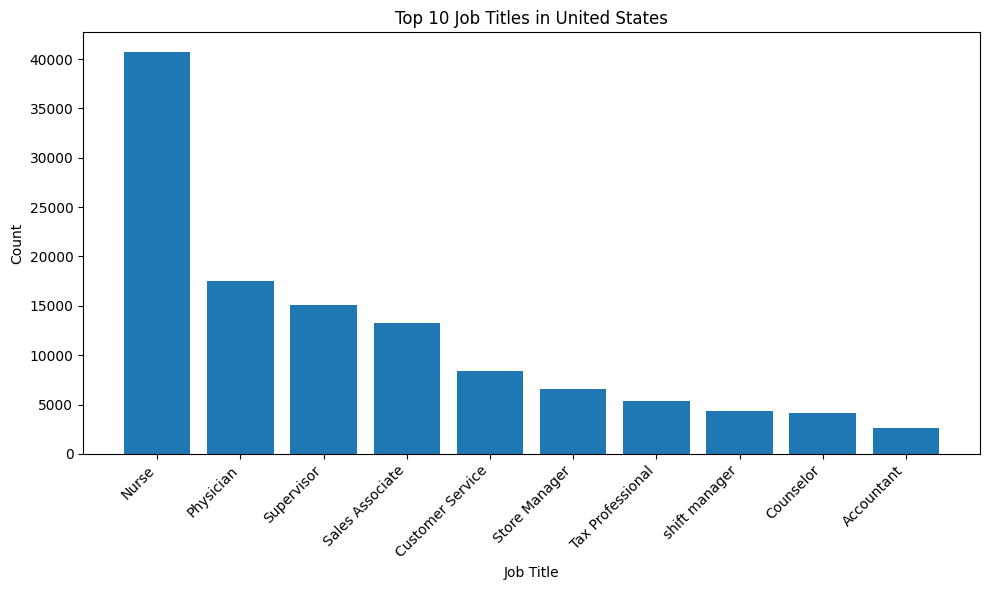

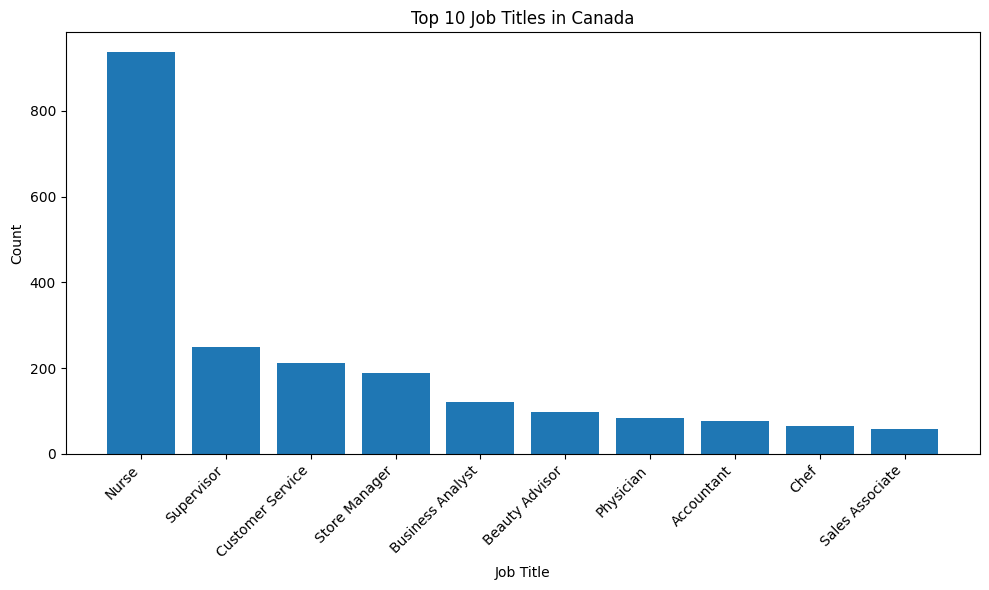

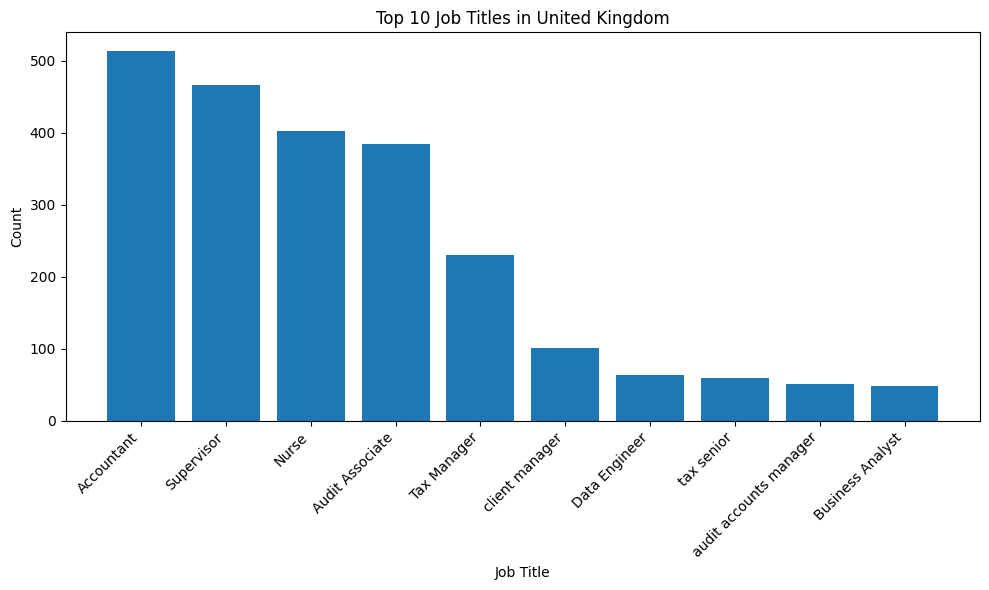

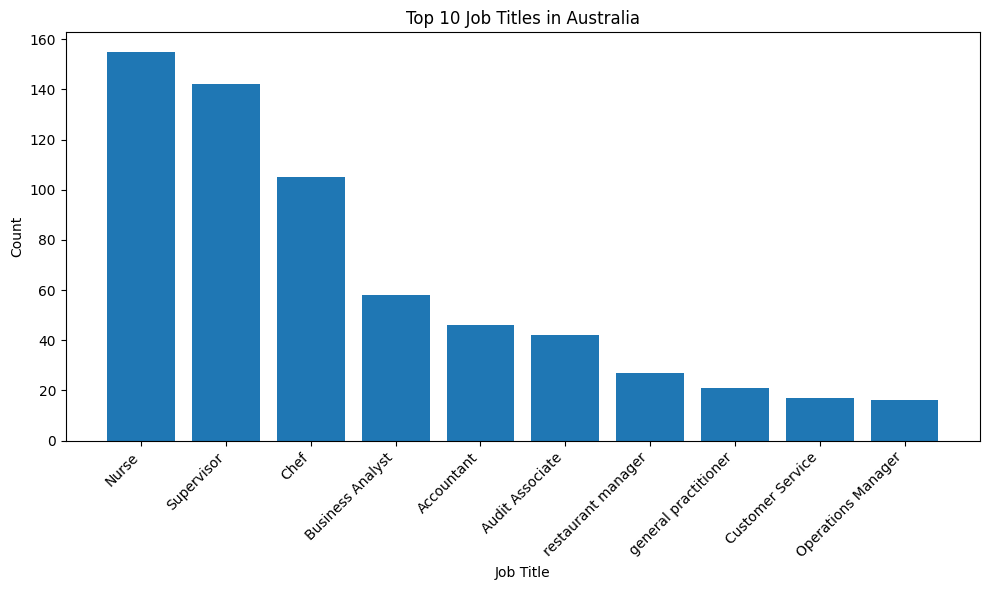

In [56]:
# Plot separate bar charts for each country
countries = df_job_postings_EDA['Country'].unique()
for country in countries:
    data_country = grouped_data_sorted[grouped_data_sorted['Country'] == country]
    plt.figure(figsize=(10, 6))
    plt.bar(data_country['Job Title'], data_country['count'])
    plt.title(f'Top 10 Job Titles in {country}')
    plt.xlabel('Job Title')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### most in-demand job  break down by country

In [57]:
# Find the top 5 most Job_Location
Job_Location = df_job_postings_EDA['Job Location'].value_counts().head(5).index

# Filter the dataframe to include only the top 10 jobs
filtered_data = df_job_postings_EDA[df_job_postings_EDA['Job Location'].isin(Job_Location)]

In [58]:
# Group by location and cleaned job title, count occurrences, and sort
grouped_data = filtered_data.groupby(['Job Location', 'Job Title']).size().reset_index(name='count')
grouped_data_sorted = grouped_data.groupby('Job Location').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)

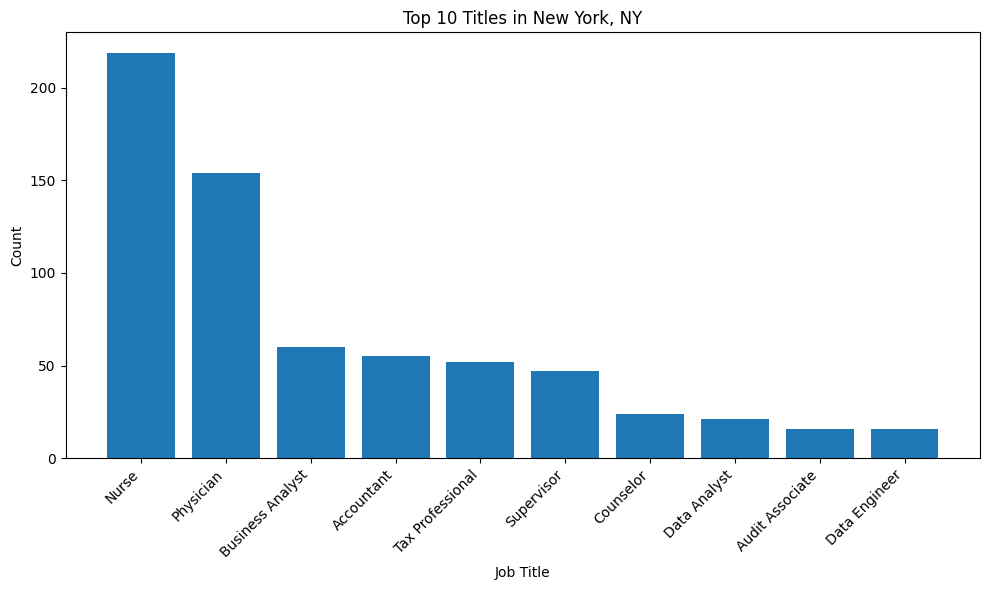

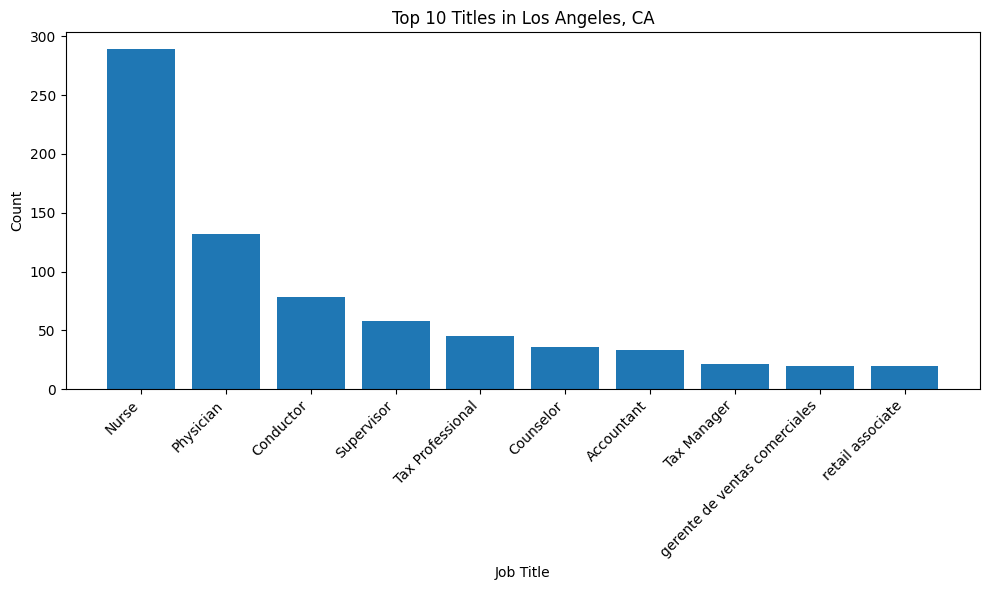

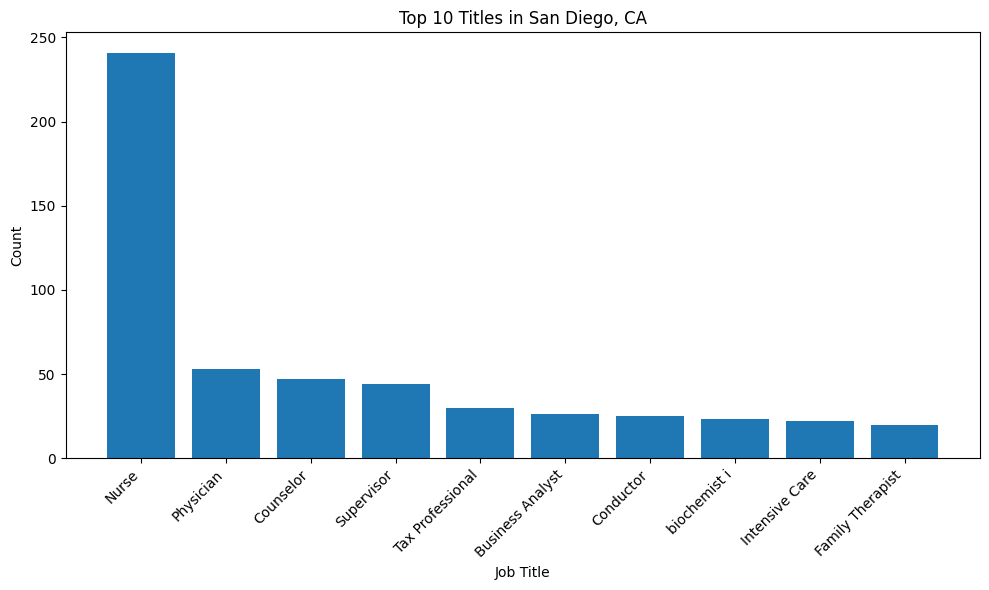

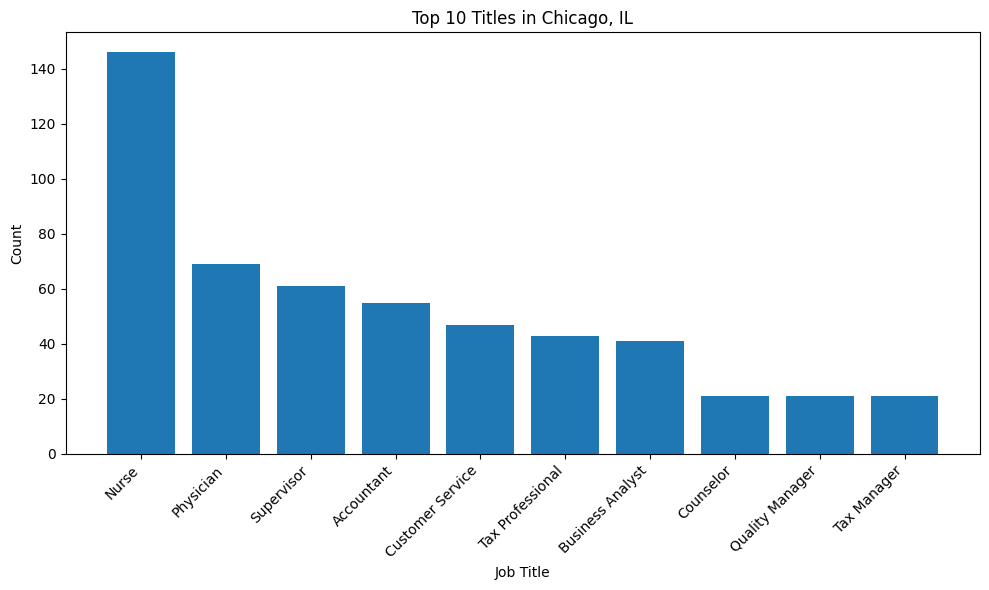

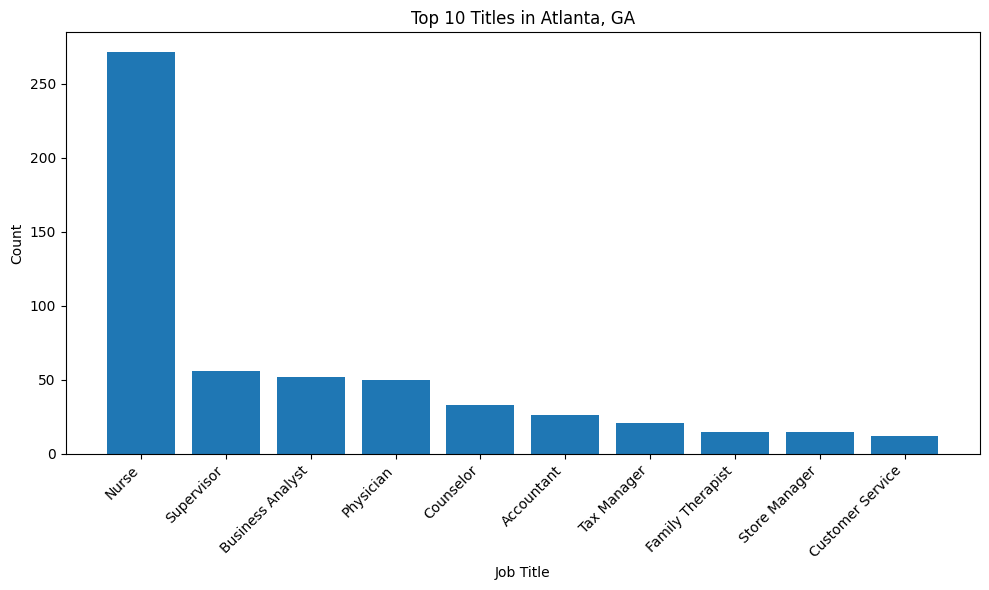

In [59]:
# Plot separate bar charts for each country
Location = Job_Location
for Location in Location:
    data_country = grouped_data_sorted[grouped_data_sorted['Job Location'] == Location]
    plt.figure(figsize=(10, 6))
    plt.bar(data_country['Job Title'], data_country['count'])
    plt.title(f'Top 10 Titles in {Location}')
    plt.xlabel('Job Title')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [60]:
df_job_postings_EDA

,Last Prcoessed Time,Active Jobs,Company,Job Location,Job Release Date,Country,Job Level,Job Type,Job Link,Industry,Job Title
0,2024-01-19 09:45:09.215838+00,f,"IRS, Office of Chief Counsel","Chamblee, GA",2024-01-17,United States,Mid senior,Onsite,3803057508,Healthcare,Supervisor
1,2024-01-21 07:43:59.257907+00,f,"IRS, Office of Chief Counsel","Norfolk, VA",2024-01-14,United States,Mid senior,Onsite,3801657385,Healthcare,stakeholder relationship manager
2,2024-01-20 13:46:15.050463+00,f,"IRS, Office of Chief Counsel","Washington, DC",2024-01-14,United States,Mid senior,Onsite,3801655896,Healthcare,management and program analyst month roster
3,2024-01-21 08:08:59.778275+00,f,"IRS, Office of Chief Counsel","Covington, KY",2024-01-14,United States,Mid senior,Onsite,3801657788,Healthcare,Supervisor
4,2024-01-21 08:09:11.897335+00,f,"IRS, Office of Chief Counsel","Oakland, CA",2024-01-14,United States,Mid senior,Onsite,3801658326,Healthcare,Supervisor
...,...,...,...,...,...,...,...,...,...,...,...
389892,2024-01-20 11:03:19.035019+00,f,Cobblestone Energy,"Sydney, New South Wales, Australia",2024-01-14,Australia,Mid senior,Onsite,3734247735,Energy,senior back end developer dubai uae
389893,2024-01-21 12:44:29.484201+00,f,Cobblestone Energy,"Montreal, Quebec, Canada",2024-01-14,Canada,Mid senior,Onsite,3735326072,Energy,senior back end developer dubai uae
389894,2024-01-20 02:16:04.606687+00,f,Cobblestone Energy,"Adelaide, South Australia, Australia",2024-01-14,Australia,Mid senior,Onsite,3735322652,Energy,senior back end developer dubai uae
389895,2024-01-21 00:57:52.757139+00,f,Cobblestone Energy,"Chicago, IL",2024-01-14,United States,Mid senior,Onsite,3735326065,Energy,senior back end developer dubai uae


### Key Industries with High Job Demand



In [61]:
# Find the top 5 most in-demand jobs
Top_10_Industry = df_job_postings_EDA['Industry'].value_counts().head(10).index

# Filter the dataframe to include only the top 10 jobs
filtered_data = df_job_postings_EDA[df_job_postings_EDA['Industry'].isin(Top_10_Industry)]


industry_counts_by_country = filtered_data.groupby(['Country', 'Industry']).size().reset_index(name='count')


industry_counts_by_country_sorted = industry_counts_by_country.sort_values(by='count', ascending=False)


fig = px.bar(industry_counts_by_country_sorted, x='Industry', y='count', color='Country',
             labels={'Industry': 'Industry', 'count': 'Count', 'Country': 'Country'},
             title='Job Posting based on Industries',
             template='plotly', color_discrete_sequence=px.colors.qualitative.Set3)


fig.update_layout(xaxis_tickangle=-45)


fig.show()

### Top jobs offered by the key industries

In [62]:
Top_5_Jobs = df_job_postings_EDA['Job Title'].value_counts().head(5).index

# Filter the dataframe to include only the top 5 jobs
filtered_data = df_job_postings_EDA[df_job_postings_EDA['Job Title'].isin(Top_5_Jobs)]

# Filter the dataframe to include only the top 10 industries
filtered_data = filtered_data[filtered_data['Industry'].isin(Top_10_Industry)]

industry_counts_by_jobs = filtered_data.groupby(['Job Title', 'Industry']).size().reset_index(name='count')

industry_counts_by_country_sorted = industry_counts_by_jobs.sort_values(by='count', ascending=False)

fig = px.bar(industry_counts_by_country_sorted, x='Job Title', y='count', color='Industry',
             labels={'Job Title': 'Job Title', 'count': 'Count', 'Industry': 'Industry'},
             title='Top Jobs Offered by Key Industries',
             template='plotly', color_discrete_sequence=px.colors.qualitative.Set3)

fig.update_layout(xaxis_tickangle=-45,
                  xaxis={'categoryorder': 'total descending'})

fig.show()

In [63]:
df_job_postings_EDA

,Last Prcoessed Time,Active Jobs,Company,Job Location,Job Release Date,Country,Job Level,Job Type,Job Link,Industry,Job Title
0,2024-01-19 09:45:09.215838+00,f,"IRS, Office of Chief Counsel","Chamblee, GA",2024-01-17,United States,Mid senior,Onsite,3803057508,Healthcare,Supervisor
1,2024-01-21 07:43:59.257907+00,f,"IRS, Office of Chief Counsel","Norfolk, VA",2024-01-14,United States,Mid senior,Onsite,3801657385,Healthcare,stakeholder relationship manager
2,2024-01-20 13:46:15.050463+00,f,"IRS, Office of Chief Counsel","Washington, DC",2024-01-14,United States,Mid senior,Onsite,3801655896,Healthcare,management and program analyst month roster
3,2024-01-21 08:08:59.778275+00,f,"IRS, Office of Chief Counsel","Covington, KY",2024-01-14,United States,Mid senior,Onsite,3801657788,Healthcare,Supervisor
4,2024-01-21 08:09:11.897335+00,f,"IRS, Office of Chief Counsel","Oakland, CA",2024-01-14,United States,Mid senior,Onsite,3801658326,Healthcare,Supervisor
...,...,...,...,...,...,...,...,...,...,...,...
389892,2024-01-20 11:03:19.035019+00,f,Cobblestone Energy,"Sydney, New South Wales, Australia",2024-01-14,Australia,Mid senior,Onsite,3734247735,Energy,senior back end developer dubai uae
389893,2024-01-21 12:44:29.484201+00,f,Cobblestone Energy,"Montreal, Quebec, Canada",2024-01-14,Canada,Mid senior,Onsite,3735326072,Energy,senior back end developer dubai uae
389894,2024-01-20 02:16:04.606687+00,f,Cobblestone Energy,"Adelaide, South Australia, Australia",2024-01-14,Australia,Mid senior,Onsite,3735322652,Energy,senior back end developer dubai uae
389895,2024-01-21 00:57:52.757139+00,f,Cobblestone Energy,"Chicago, IL",2024-01-14,United States,Mid senior,Onsite,3735326065,Energy,senior back end developer dubai uae


### Top Companies actively hiring

In [64]:
# Find the top 5 most in-demand jobs
Top_10_company = df_job_postings_EDA['Company'].value_counts().head(10).index



# Filter the dataframe to include only the top 10 jobs
filtered_data = df_job_postings_EDA[df_job_postings_EDA['Company'].isin(Top_10_company)]


industry_counts_by_country = filtered_data.groupby(['Company']).size().reset_index(name='count')


industry_counts_by_country_sorted = industry_counts_by_country.sort_values(by='count', ascending=False)


fig = px.bar(industry_counts_by_country_sorted, x='Company', y='count',
             labels={'Company': 'Company', 'count': 'Count'},
             title='Top 10 actively hiring companies ',
             template='plotly', color_discrete_sequence=px.colors.qualitative.Set3)


fig.update_layout(xaxis_tickangle=-45)


fig.show()

## Analysis of the Data related jobs

In [65]:
# filtered_df = df_job_postings[df_job_postings['cleaned_job_title'].str.contains('Data.*Engineer|Engineer.*Data', case=False, regex=True)]
# Data_jobs = df_job_postings_EDA[df_job_postings_EDA['Job Title'].str.contains('Data|statistician|business.*analyst|analyst.*business|machine.*Learning|Learning.*machine|Analytics|intelligence', case=False, regex=True)]


In [66]:
# Data_jobs.shape

In [67]:
# Data_jobs.head()

In [68]:

# #Intern
# # Data_jobs['Job Title'] = Data_jobs['Job Title'].apply(lambda x: 'Interns for Data Related Roles' if ('intern' in x.lower()) and (not re.search(r'\b(manager|internal)\b', x.lower())) else x)

# #Consultant

# Data_jobs['Job Title'] = Data_jobs['Job Title'].apply(lambda x: 'Consultant' if 'consultant' in x.lower() else x)


# # Database managerment
# Data_jobs['Job Title'] = Data_jobs['Job Title'].apply(lambda x: 'Database Management' if re.search(r'\bdatabase\binsfrastructure\b(?!.*manager)', x.lower()) else x)

# # Data Engineering Manager
# Data_jobs['Job Title'] = Data_jobs['Job Title'].apply(lambda x: 'Data Engineering Manager' if re.search(r'data.*Engineer.*manager|manager.*engineer.*data', x.lower()) else x)

# # Data Analytics  Manager
# Data_jobs['Job Title'] = Data_jobs['Job Title'].apply(lambda x: 'Data Analytics Manager' if re.search(r'Analyitcs.*manager|manager.*Analytics', x.lower()) else x)

# # Data Engineer
# Data_jobs['Job Title'] = Data_jobs['Job Title'].apply(lambda x: 'Data Engineer' if re.search(r'\bdata(?:\s+\w+)*\s+engineer\b(?!.*manager)', x.lower()) else x)

# # Machine Learning Engineer
# Data_jobs['Job Title'] = Data_jobs['Job Title'].apply(lambda x: 'Machine Learning Engineer' if re.search(r'\bmachine\s+learning\s+engineer\b', x.lower()) else x)

# # Data Science Manager
# Data_jobs['Job Title'] = Data_jobs['Job Title'].apply(lambda x: 'Data Science Manager' if re.search(r'\bdata\s+science\s+manager\b|\bmanager\s+data\s+science\b', x.lower()) else x)

# # Data Scientist
# Data_jobs['Job Title'] = Data_jobs['Job Title'].apply(lambda x: 'Data Scientist' if re.search(r'\bdata\s+scientist\b(?!.*manager)', x.lower()) else x)


# # Data Analyst or Data Analytics
# Data_jobs['Job Title'] = Data_jobs['Job Title'].apply(lambda x: 'Data Analyst' if re.search(r'\bdata\s+analyst\b|\bdata\s+analytics\b\bintelligence\b.*\bdata\b\bdata\b.*\bintelligence\b(?!.*manager)', x.lower()) else x)

# # Business Analyst
# Data_jobs['Job Title'] = Data_jobs['Job Title'].apply(lambda x: 'Business Analyst' if re.search(r'\banalyst\b.*\bbusiness\b|\bbusiness\b.*\banalyst\b|\bbusiness\s+analytics\b|\banalytics\b.*\bbusiness\b|\bbusiness\b.*\banalytics\b|\banalyst\b.*\banalytics\b|\banalytics\b.*\banalyst\b', x.lower()) and not re.search(r'\bmanager\b', x.lower()) else x)

# #Statitician
# Data_jobs['Job Title'] = Data_jobs['Job Title'].apply(lambda x: 'Statistician' if 'statistician' in x.lower() else x)



In [69]:
# Data_jobs[Data_jobs['Job Title']=='Interns for Data Related Roles']

In [70]:
# List of titles to filter
titles_to_filter = ['Interns for Data Related Roles', 'Consultant', 'Database Management', 'Data Engineering Manager', 'Data Analytics Manager', 'Data Engineer', 'Machine Learning Engineer', 'Data Science Manager', 'Data Analyst', 'Data Scientist', 'Business Analyst', 'Statistician']

# Filter the DataFrame based on the titles
Data_jobs = df_job_postings_EDA[df_job_postings_EDA['Job Title'].isin(titles_to_filter)]


In [71]:
Data_jobs['Job Title'].unique()

array(['Business Analyst', 'Data Engineer', 'Data Scientist',
       'Data Analyst', 'Machine Learning Engineer', 'Statistician',
       'Data Science Manager', 'Data Engineering Manager'], dtype=object)

In [72]:
Data_jobs['Job Title'].nunique()

8

In [73]:
Data_jobs['Job Title'].count()


5085

In [74]:
Data_jobs

,Last Prcoessed Time,Active Jobs,Company,Job Location,Job Release Date,Country,Job Level,Job Type,Job Link,Industry,Job Title
8088,2024-01-19 09:45:09.215838+00,f,Dollar General,"Goodlettsville, TN",2024-01-13,United States,Mid senior,Onsite,3804762866,Retail,Business Analyst
17041,2024-01-19 09:45:09.215838+00,f,Goodwin Recruiting,"Osseo, WI",2024-01-13,United States,Mid senior,Onsite,3755183978,Staffing and Recruiting,Business Analyst
17334,2024-01-19 09:45:09.215838+00,f,Goodwin Recruiting,"Osseo, WI",2024-01-13,United States,Mid senior,Onsite,3804721000,Staffing and Recruiting,Business Analyst
18683,2024-01-19 09:45:09.215838+00,f,Northrop Grumman,"Elkton, MD",2024-01-13,United States,Associate,Onsite,3795913118,Defense and Space Manufacturing,Business Analyst
18855,2024-01-19 09:45:09.215838+00,f,Northrop Grumman,"Aurora, CO",2024-01-13,United States,Associate,Onsite,3802547702,Defense and Space Manufacturing,Business Analyst
...,...,...,...,...,...,...,...,...,...,...,...
389885,2024-01-19 09:45:09.215838+00,f,Cobblestone Energy,"Manchester, England, United Kingdom",2024-01-13,United Kingdom,Mid senior,Onsite,3780711084,Energy,Business Analyst
389888,2024-01-19 09:45:09.215838+00,f,Cobblestone Energy,"Cardiff, Wales, United Kingdom",2024-01-13,United Kingdom,Mid senior,Onsite,3780708464,Energy,Business Analyst
389890,2024-01-19 09:45:09.215838+00,f,Cobblestone Energy,"London, England, United Kingdom",2024-01-13,United Kingdom,Mid senior,Onsite,3780708462,Energy,Business Analyst
389891,2024-01-19 09:45:09.215838+00,f,Cobblestone Energy,"Los Angeles, CA",2024-01-13,United States,Mid senior,Onsite,3780707505,Energy,Business Analyst


### Top in demand data related job

In [75]:

Job_tite_count = Data_jobs.groupby(['Country', 'Job Title']).size().reset_index(name='count')


Job_tite_count_sorted = Job_tite_count.sort_values(by='count', ascending=False)


fig = px.bar(Job_tite_count_sorted, x='Job Title', y='count', color='Country',
             labels={'Job Title': 'Job Title', 'count': 'Count', 'Country': 'Country'},
             title=' Most In-Demand data related jobs',
             template='plotly', color_discrete_sequence=px.colors.qualitative.Set3)


fig.update_layout(xaxis_tickangle=-45)


fig.show()

### Data related Job demand in each country

In [76]:
# Group by country and cleaned job title, count occurrences, and sort
grouped_data = Data_jobs.groupby(['Country', 'Job Title']).size().reset_index(name='count')
grouped_data_sorted = grouped_data.groupby('Country').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)

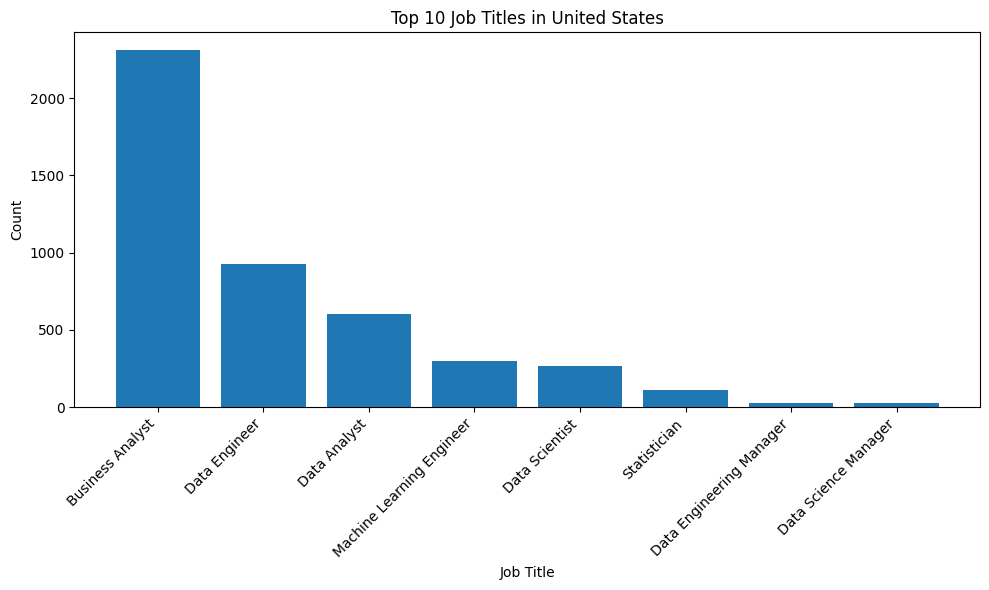

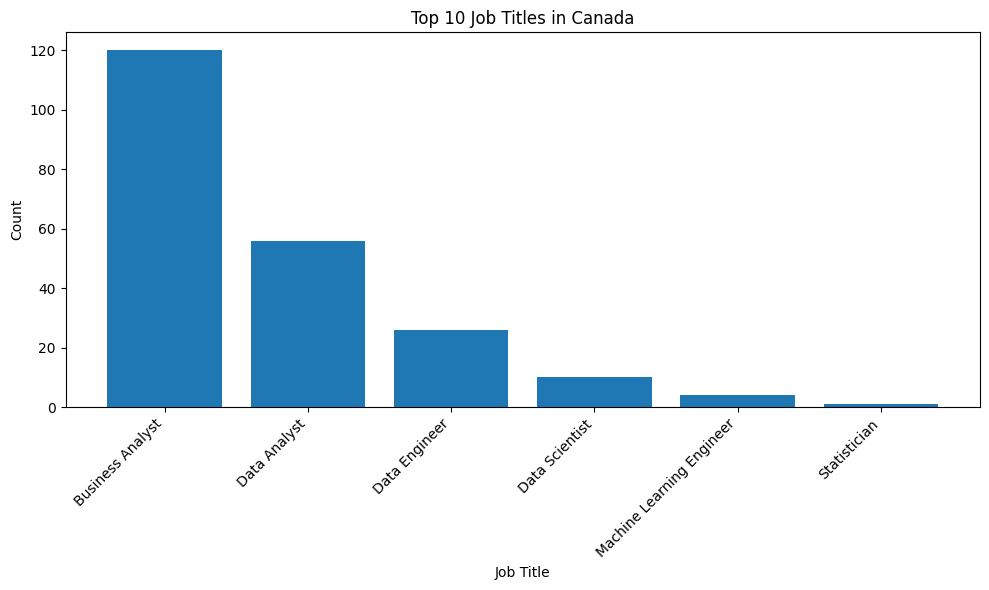

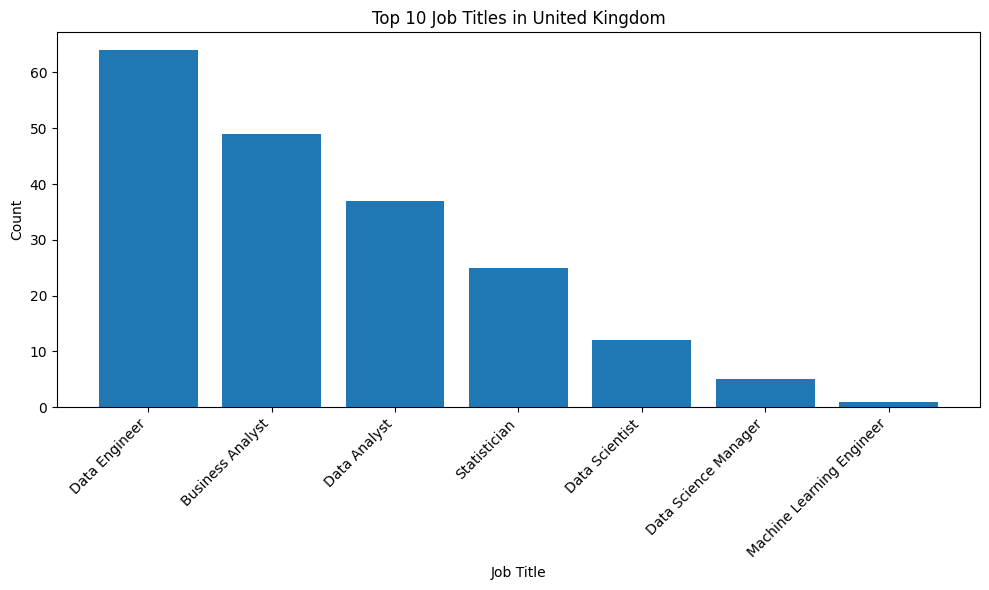

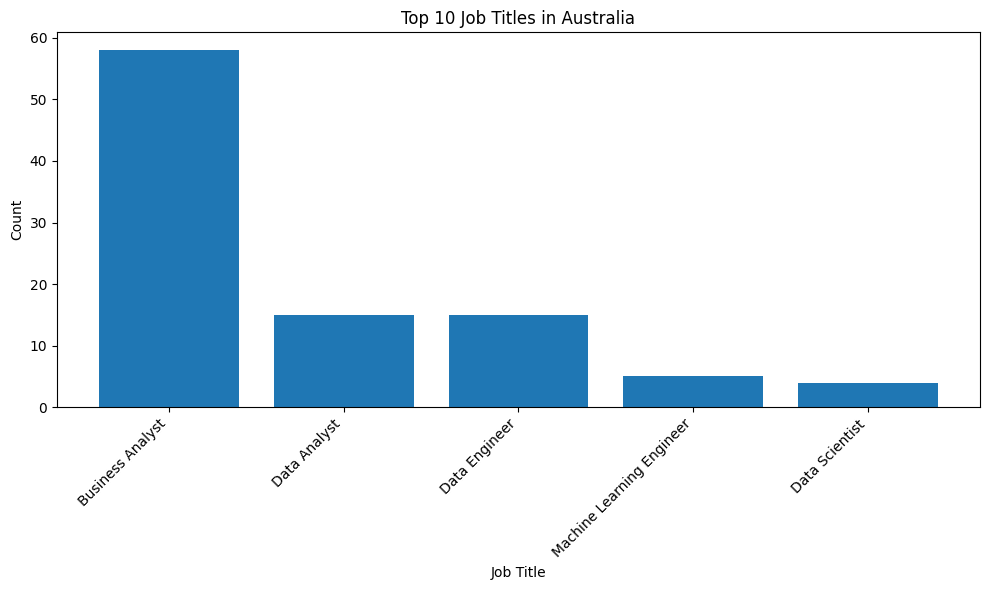

In [77]:
# Plot separate bar charts for each country
countries = Data_jobs['Country'].unique()
for country in countries:
    data_country = grouped_data_sorted[grouped_data_sorted['Country'] == country]
    plt.figure(figsize=(10, 6))
    plt.bar(data_country['Job Title'], data_country['count'])
    plt.title(f'Top 10 Job Titles in {country}')
    plt.xlabel('Job Title')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### Top Industries hiring data profesional

In [78]:
Top_10_Industry = Data_jobs['Industry'].value_counts().head(10).index

filtered_data = Data_jobs[Data_jobs['Industry'].isin(Top_10_Industry)]

Job_tite_count = filtered_data.groupby(['Industry', 'Job Title']).size().reset_index(name='count')

Job_tite_count_sorted = Job_tite_count.sort_values(by='count', ascending=False)

fig = px.bar(Job_tite_count_sorted, x='Industry', y='count', color='Job Title',
             labels={'Industry': 'Industry', 'count': 'Count', 'Job Title': 'Job Title'},
             title='Top Industries Hiring data related roles',
             template='plotly', color_discrete_sequence=px.colors.qualitative.Set3)

fig.update_layout(xaxis_tickangle=-45,
                  xaxis={'categoryorder':'total descending'})

fig.show()

#### Top Companies  hiring data profesional
|

In [79]:


Top_10_COMPANY = Data_jobs['Company'].value_counts().head(5).index

filtered_data = Data_jobs[Data_jobs['Company'].isin(Top_10_COMPANY)]

Job_tite_count = filtered_data.groupby(['Company', 'Job Title']).size().reset_index(name='count')

Job_tite_count_sorted = Job_tite_count.sort_values(by='count', ascending=False)

fig = px.bar(Job_tite_count_sorted, x='Company', y='count', color='Job Title',
             labels={'Company': 'Company', 'count': 'Count', 'Job Title': 'Job Title'},
             title='Top Companies Hiring data related roles',
             template='plotly', color_discrete_sequence=px.colors.qualitative.Set3)

fig.update_layout(xaxis_tickangle=-45,
                  xaxis={'categoryorder':'total descending'})

fig.show()


In [80]:
df_job_postings_EDA.head()

,Last Prcoessed Time,Active Jobs,Company,Job Location,Job Release Date,Country,Job Level,Job Type,Job Link,Industry,Job Title
0,2024-01-19 09:45:09.215838+00,f,"IRS, Office of Chief Counsel","Chamblee, GA",2024-01-17,United States,Mid senior,Onsite,3803057508,Healthcare,Supervisor
1,2024-01-21 07:43:59.257907+00,f,"IRS, Office of Chief Counsel","Norfolk, VA",2024-01-14,United States,Mid senior,Onsite,3801657385,Healthcare,stakeholder relationship manager
2,2024-01-20 13:46:15.050463+00,f,"IRS, Office of Chief Counsel","Washington, DC",2024-01-14,United States,Mid senior,Onsite,3801655896,Healthcare,management and program analyst month roster
3,2024-01-21 08:08:59.778275+00,f,"IRS, Office of Chief Counsel","Covington, KY",2024-01-14,United States,Mid senior,Onsite,3801657788,Healthcare,Supervisor
4,2024-01-21 08:09:11.897335+00,f,"IRS, Office of Chief Counsel","Oakland, CA",2024-01-14,United States,Mid senior,Onsite,3801658326,Healthcare,Supervisor


In [81]:
df_job_postings_EDA['Country'].value_counts(normalize = True)*100

Country
United States     93.812212
United Kingdom     2.975145
Canada             2.428847
Australia          0.783797
Name: proportion, dtype: float64

In [82]:
df_job_postings_EDA.to_csv('/content/drive/MyDrive/NUS MSBA/CS5344/Group Project/final_df.csv')